# **Proyecto 1**

Integrantes:


*   Niño Pedraza Eduardo
*   Reyes Ramírez Raquel
*   Salas Cortés Emiliano


A continuación se presenta un análisis de sensibilidad de los parámetros del modelo tomando a $\theta$ como función del tiempo.

# Modelo Hull-White

$$
dr(t) = [\theta(t) - a \cdot r(t)]dt + \sigma dW(t)
$$

Donde:
- $ a $: velocidad de reversión a la media.
- $ \sigma $: volatilidad.
- $ \theta(t) $: función de tendencia o nivel a revertir
  $$
  \theta(t) = \theta_0 + \theta_1 \sin(\omega t)
  $$
- $ W(t) $: movimiento browniano estándar.
- $ r(t) $: tasa de interés instantánea.




*   Media teórica de $ r(t) $

$$
\mathbb{E}[r(t)] = r_0 e^{-at} + \int_0^t e^{-a(t-s)} \theta(s) ds
$$



*   Varianza teórica de $ r(t) $
$$
\text{Var}[r(t)] = \frac{\sigma^2}{2a} (1 - e^{-2at})
$$


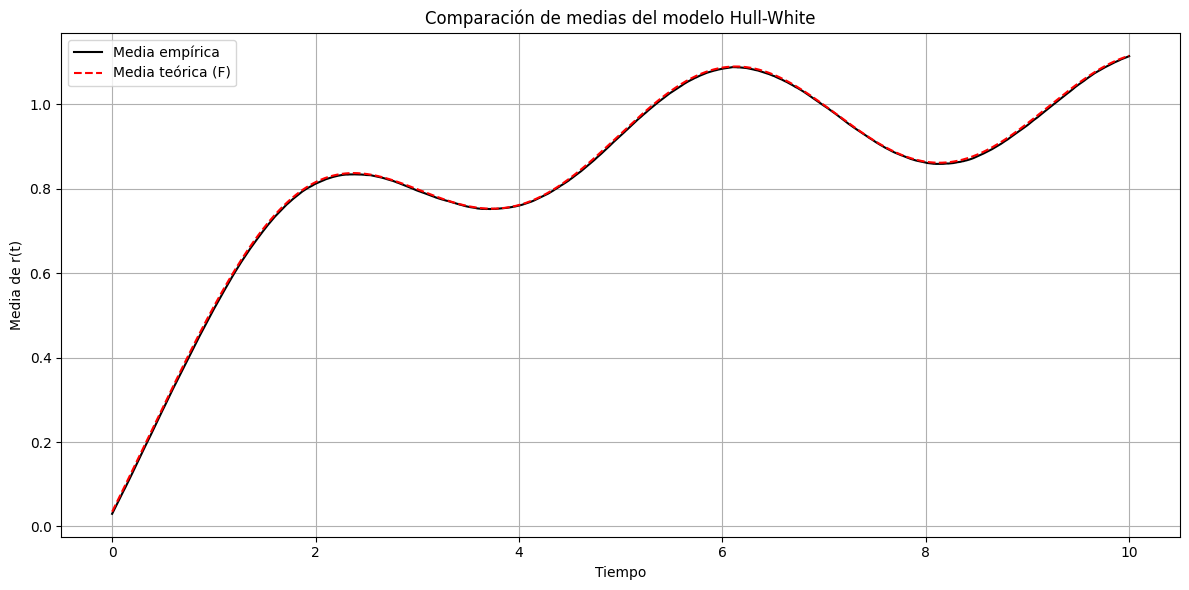

Error absoluto media: 0.0010543550651842537
Error relativo media: 0.0009459368566383237
Media empírica en T: 1.1135602809806373
Varianza empírica en T: 0.009813522619763614
Media teórica en T: 1.1146146360458216
Varianza teórica en T: 0.009999546000702377


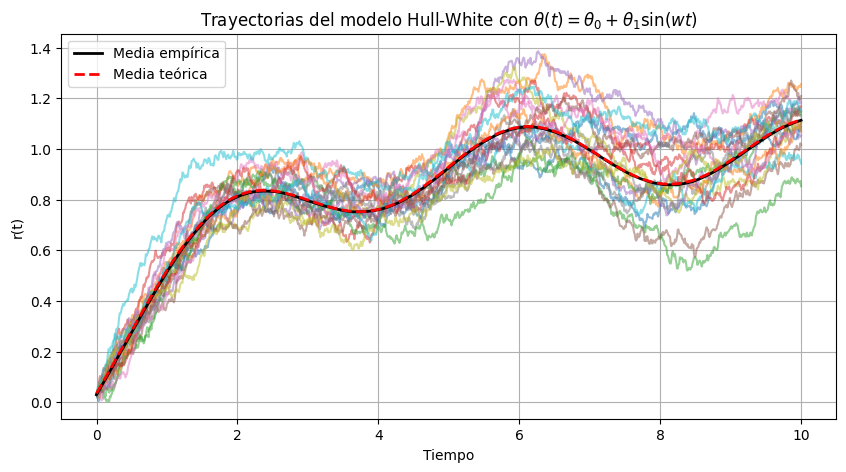

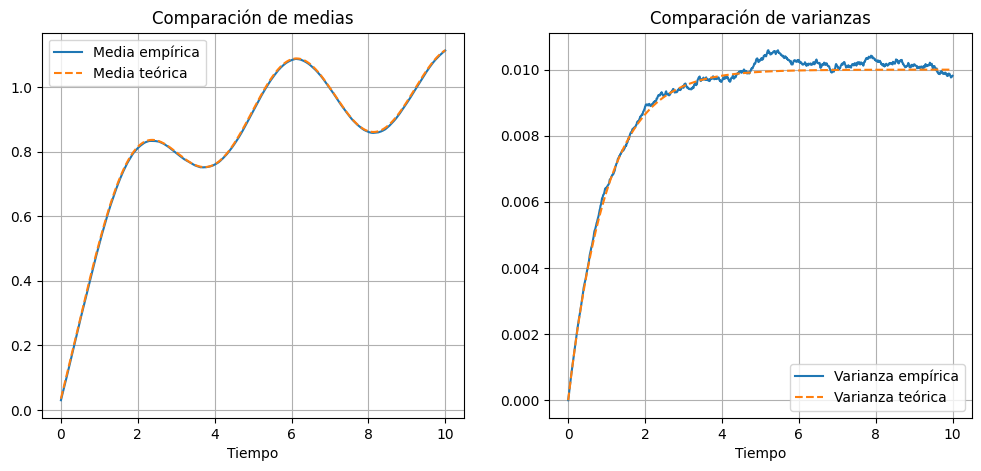

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
a = 0.5
sigma = 0.1
theta0 = 0.5
theta1 = 0.2
w = 1.5
r0 = 0.03
T = 10
N = 1000
dt = T / N
t = np.linspace(0, T, N+1)

# Función theta(t)
def theta(t):
    return theta0 + theta1 * np.sin(w * t)

# Simulación de trayectorias del modelo Hull-White
M = 5000  # número de trayectorias
r = np.zeros((M, N+1))  # r[j, i] almacena la i-ésima posición de la j-ésima trayectoria

for j in range(M):
    r[j, 0] = r0
    for i in range(1, N + 1):
        dr = (theta(t[i - 1]) - a * r[j, i - 1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        r[j, i] = r[j, i - 1] + dr

# Momentos empíricos
media_emp = np.mean(r, axis=0)
var_emp = np.var(r, axis=0)


# ======== MEDIA TEÓRICA CON F(t) ========
F_vals = np.zeros(N + 1)
for i in range(N + 1):
    s = t[:i + 1]
    integrando = np.exp(-a * (t[i] - s)) * theta(s)
    F_vals[i] = np.sum(integrando) * dt

media_teo = r0 * np.exp(-a * t) + F_vals



# ======== GRAFICAR ========
plt.figure(figsize=(12, 6))
plt.plot(t, media_emp, label='Media empírica', color='black')
plt.plot(t, media_teo, 'r--', label='Media teórica (F)')
plt.title('Comparación de medias del modelo Hull-White')
plt.xlabel('Tiempo')
plt.ylabel('Media de r(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ======== VARIANZA TEÓRICA ========
var_teo = (sigma**2 / (2 * a)) * (1 - np.exp(-2 * a * t))

# Comparación numérica en T
print("Error absoluto media:", abs(media_emp[-1] - media_teo[-1]))
print("Error relativo media:", abs(media_emp[-1] - media_teo[-1]) / abs(media_teo[-1]))
print("Media empírica en T:", media_emp[-1])
print("Varianza empírica en T:", var_emp[-1])
print("Media teórica en T:", media_teo[-1])
print("Varianza teórica en T:", var_teo[-1])

# Trayectorias simuladas
plt.figure(figsize=(10, 5))
for j in range(20):  # mostrar solo 20 trayectorias
    plt.plot(t, r[j], alpha=0.5)
plt.plot(t, media_emp, 'k', label='Media empírica', linewidth=2)
plt.plot(t, media_teo, 'r--', label='Media teórica', linewidth=2)
plt.title('Trayectorias del modelo Hull-White con $\\theta(t) = \\theta_0 + \\theta_1 \\sin(wt)$')
plt.xlabel('Tiempo')
plt.ylabel('r(t)')
plt.legend()
plt.grid(True)
plt.show()

# Comparación media y varianza
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, media_emp, label='Media empírica')
plt.plot(t, media_teo, '--', label='Media teórica')
plt.title('Comparación de medias')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, var_emp, label='Varianza empírica')
plt.plot(t, var_teo, '--', label='Varianza teórica')
plt.title('Comparación de varianzas')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True)
plt.show()




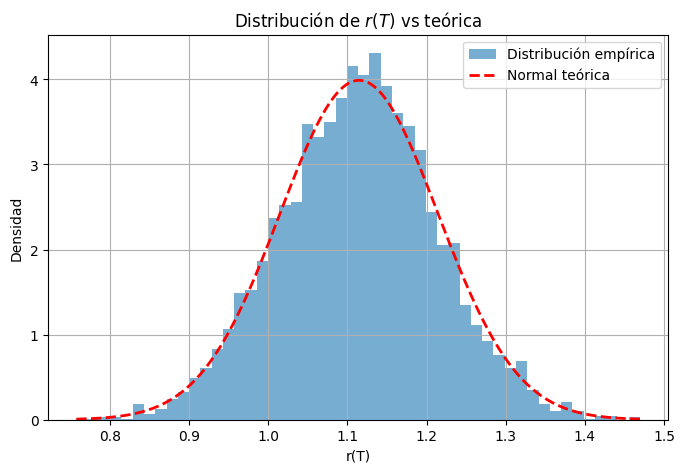

In [ ]:
# Histograma final
r_final = r[:, -1]
plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(r_final, bins=50, density=True, alpha=0.6, label='Distribución empírica')
x_vals = np.linspace(min(bins), max(bins), 200)
plt.plot(x_vals, norm.pdf(x_vals, media_teo[-1], np.sqrt(var_teo[-1])), 'r--', linewidth=2, label='Normal teórica')
plt.title('Distribución de $r(T)$ vs teórica')
plt.xlabel('r(T)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

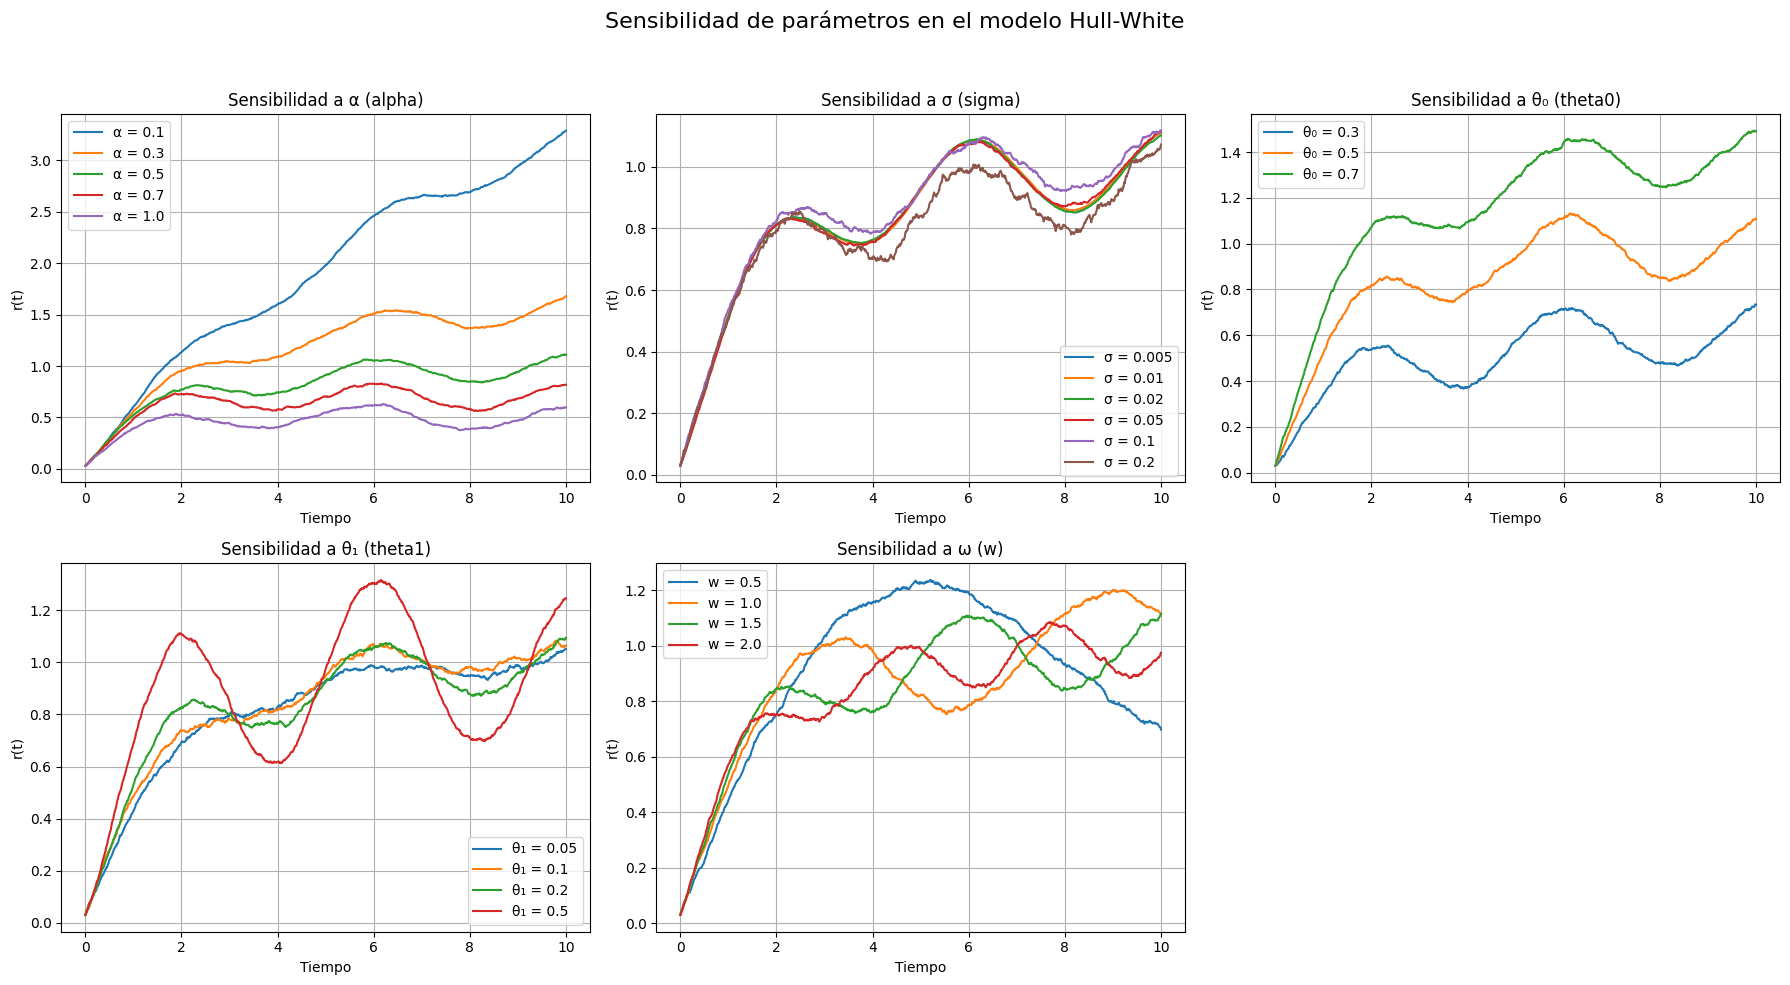

In [ ]:

# ---------------- Parámetros base y función de simulación ----------------
r0 = 0.03
T = 10
N = 1000
dt = T / N
t = np.linspace(0, T, N+1)
M = 20  # Número de trayectorias

def simular_hw(a, sigma, theta0, theta1, w):
    def theta(t):
        return theta0 + theta1 * np.sin(w * t)
    r = np.zeros((M, N+1))
    for j in range(M):
        r[j, 0] = r0
        for i in range(1, N + 1):
            dr = (theta(t[i - 1]) - a * r[j, i - 1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
            r[j, i] = r[j, i - 1] + dr
    return np.mean(r, axis=0)

# ---------------- Graficar todo en una cuadrícula ----------------
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()  # Para acceso fácil a los subplots

# ---- Sensibilidad a alpha ----
for a in [0.1, 0.3, 0.5, 0.7, 1.0]:
    media = simular_hw(a, 0.1, 0.5, 0.2, 1.5)
    axs[0].plot(t, media, label=f'α = {a}')
axs[0].set_title('Sensibilidad a α (alpha)')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('r(t)')
axs[0].legend()
axs[0].grid(True)

# ---- Sensibilidad a sigma ----
for sigma in [0.005, 0.01, 0.02, 0.05, 0.1, 0.2]:
    media = simular_hw(0.5, sigma, 0.5, 0.2, 1.5)
    axs[1].plot(t, media, label=f'σ = {sigma}')
axs[1].set_title('Sensibilidad a σ (sigma)')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('r(t)')
axs[1].legend()
axs[1].grid(True)

# ---- Sensibilidad a theta0 ----
for theta0 in [0.3, 0.5, 0.7]:
    media = simular_hw(0.5, 0.1, theta0, 0.2, 1.5)
    axs[2].plot(t, media, label=f'θ₀ = {theta0}')
axs[2].set_title('Sensibilidad a θ₀ (theta0)')
axs[2].set_xlabel('Tiempo')
axs[2].set_ylabel('r(t)')
axs[2].legend()
axs[2].grid(True)

# ---- Sensibilidad a theta1 ----
for theta1 in [0.05, 0.1, 0.2, 0.5]:
    media = simular_hw(0.5, 0.1, 0.5, theta1, 1.5)
    axs[3].plot(t, media, label=f'θ₁ = {theta1}')
axs[3].set_title('Sensibilidad a θ₁ (theta1)')
axs[3].set_xlabel('Tiempo')
axs[3].set_ylabel('r(t)')
axs[3].legend()
axs[3].grid(True)

# ---- Sensibilidad a w ----
for w in [0.5, 1.0, 1.5, 2.0]:
    media = simular_hw(0.5, 0.1, 0.5, 0.2, w)
    axs[4].plot(t, media, label=f'w = {w}')
axs[4].set_title('Sensibilidad a ω (w)')
axs[4].set_xlabel('Tiempo')
axs[4].set_ylabel('r(t)')
axs[4].legend()
axs[4].grid(True)

# ---- Espacio extra para layout limpio ----
axs[5].axis('off')  # Deja el sexto subplot vacío

plt.suptitle('Sensibilidad de parámetros en el modelo Hull-White', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
